## DIAMOND PRICE PREDICTION: Linear Regression Example

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
!pip install sklearn

  Using cached scikit_learn-1.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=13351a0af8386425ff828227edc46d8ac5bdda8253c1259608727f8ac1fe25fd
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [7]:
df = pd.read_csv('../data/diamonds.csv')
df.shape

(53940, 11)

In [9]:
df = df.drop(["Unnamed: 0"], axis=1)

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


In [14]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [17]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,0.295733,0.010729,0.025017,0.029069,0.095023
table,0.181646,0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [18]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

/tmp/ipykernel_421/2797590206.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,carat,depth,table,price,x,y,z
carat,NaN,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,NaN,NaN,0.295733,0.010729,0.025017,0.029069,0.095023
table,NaN,NaN,NaN,0.127245,0.196097,0.184493,0.152483
price,NaN,NaN,NaN,NaN,0.887231,0.867864,0.868206
x,NaN,NaN,NaN,NaN,NaN,0.974918,0.975435
y,NaN,NaN,NaN,NaN,NaN,NaN,0.956744
z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Find index of feature columns with correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]
to_drop

['price', 'x', 'y', 'z']

<AxesSubplot:>

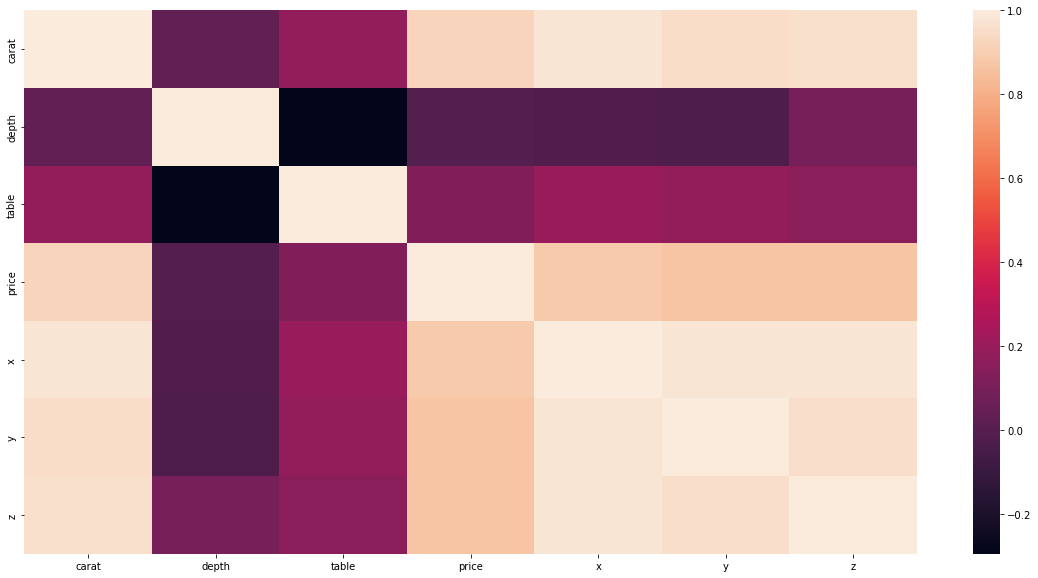

In [20]:
#### 4.2 Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(df.corr())

/tmp/ipykernel_421/3615738660.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)  # make mask


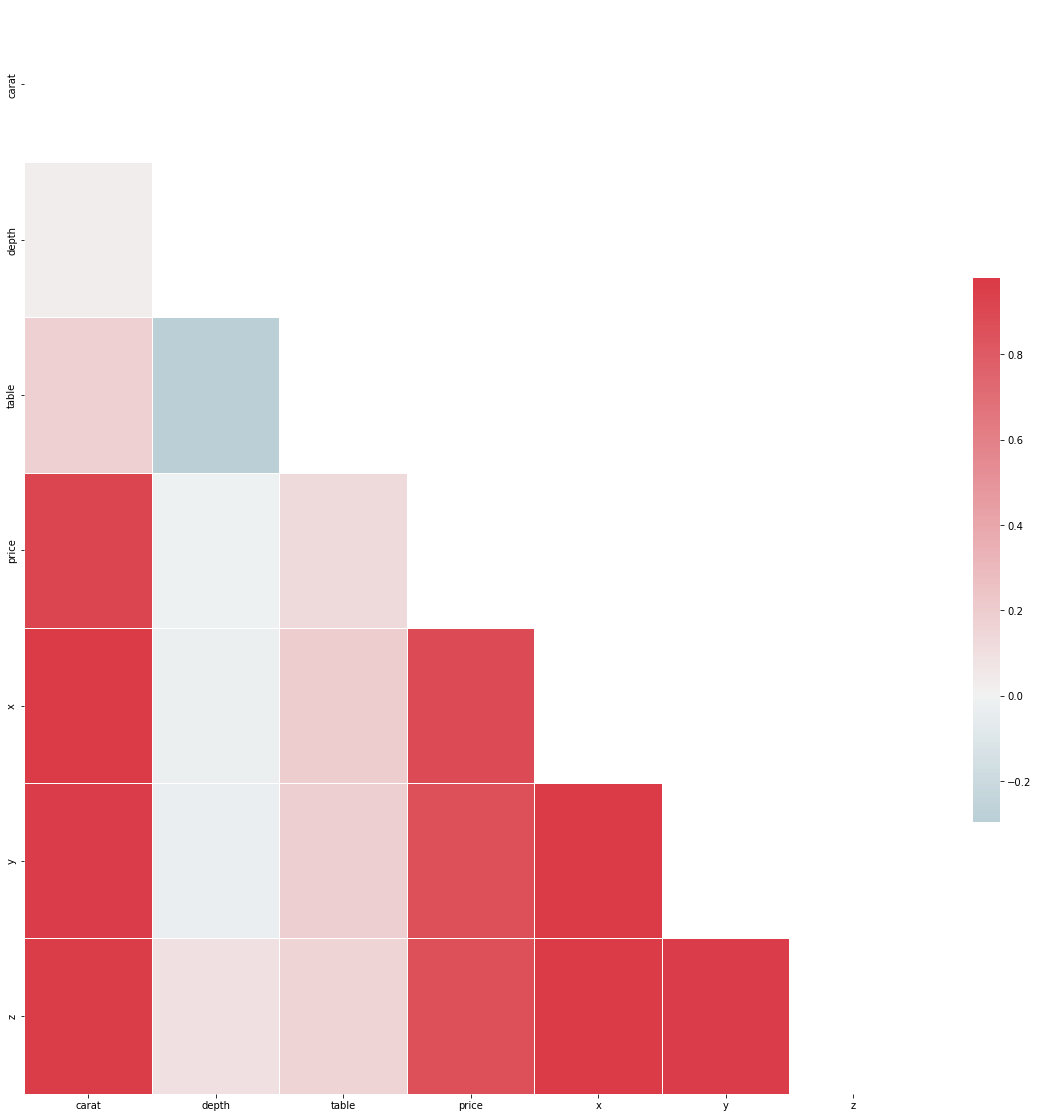

In [21]:
# seaborn
## first_twenty = har_train.iloc[:, :20] # pull out first 20 feats
corr = df.corr()  # compute correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)  # make mask
mask[np.triu_indices_from(mask)] = True  # mask the upper triangle

fig, ax = plt.subplots(figsize=(20, 20))  # create a figure and a subplot
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # custom color map
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    linewidth=0.5,
    cbar_kws={'shrink': 0.5}
);

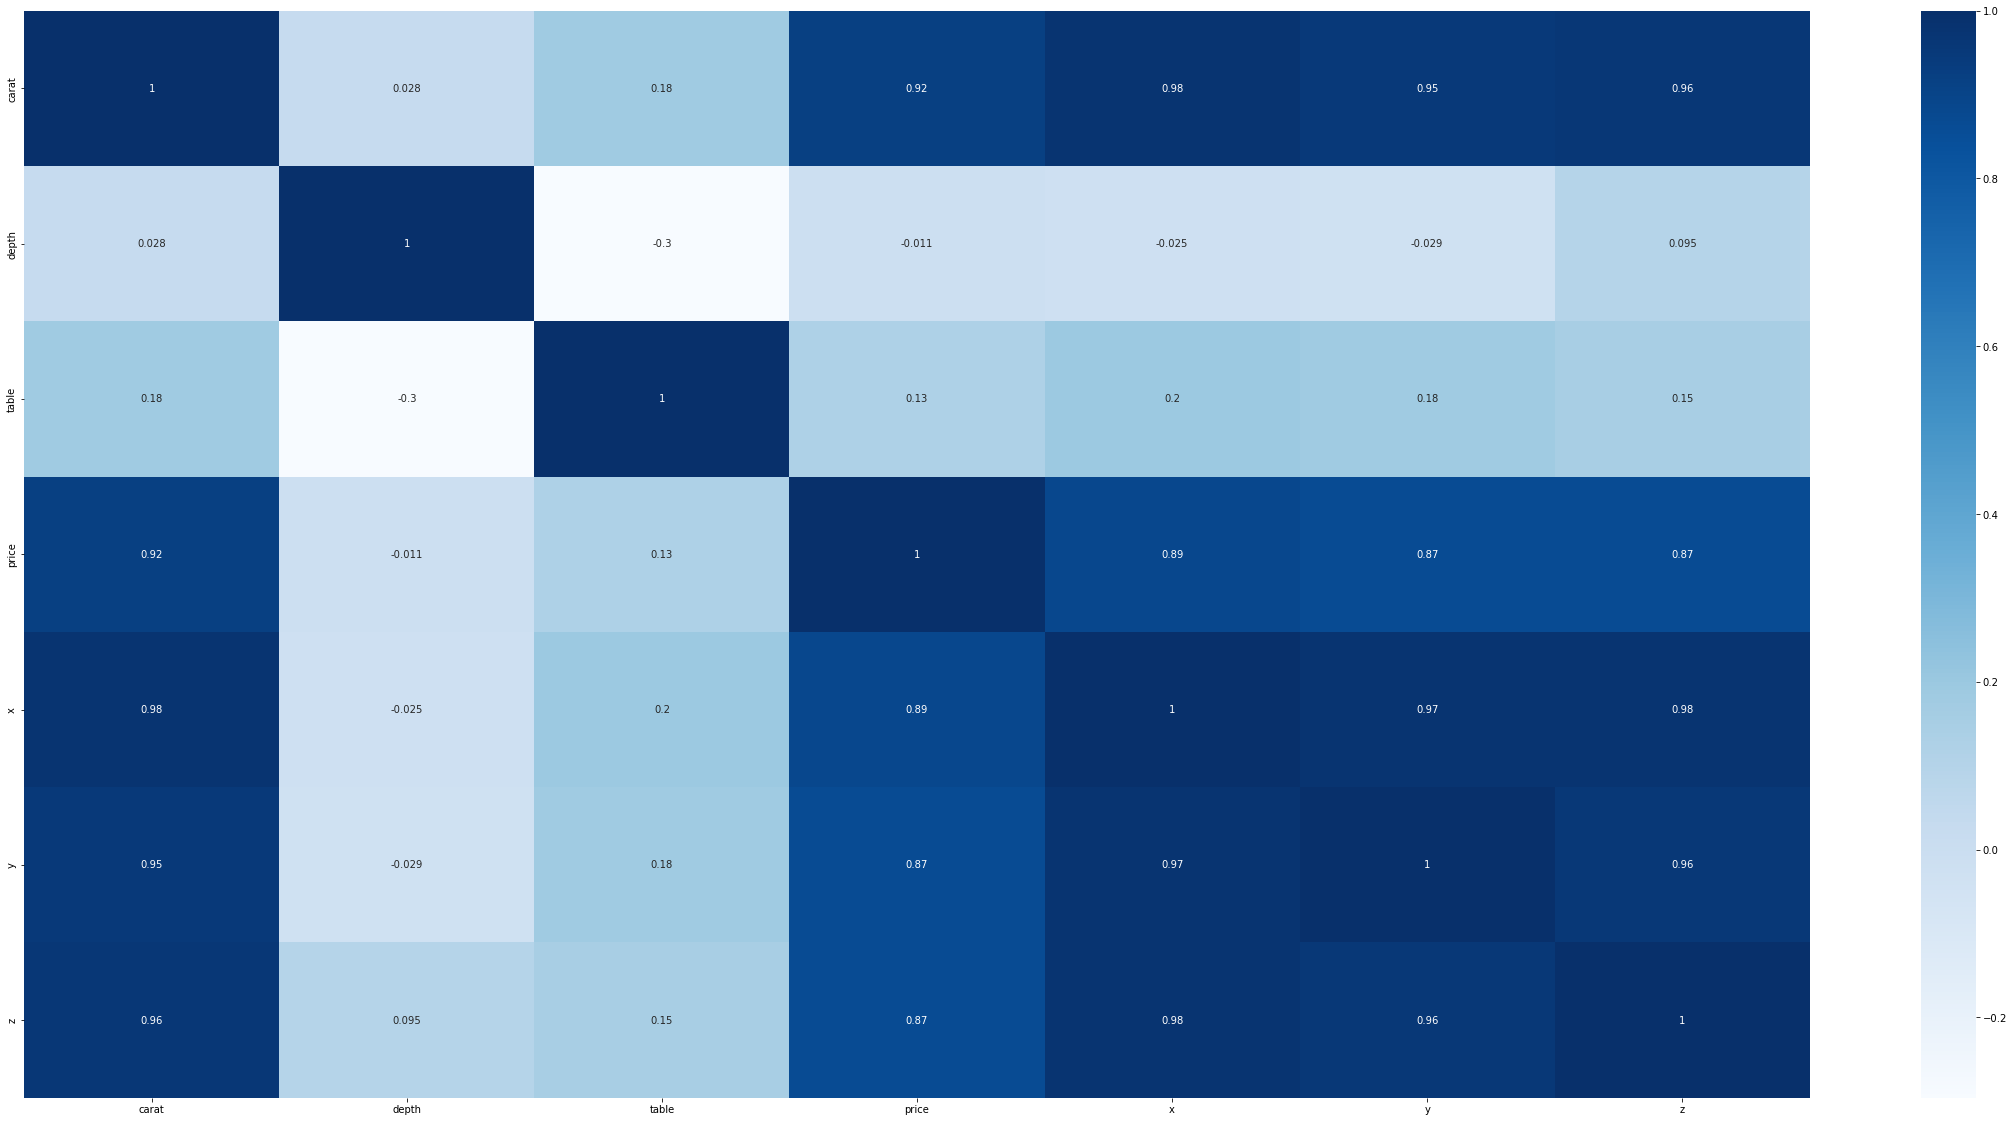

In [22]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, ax=ax);

## Exploratory data analysis

In [23]:
# target
print(df['price'].describe())

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64


<AxesSubplot:>

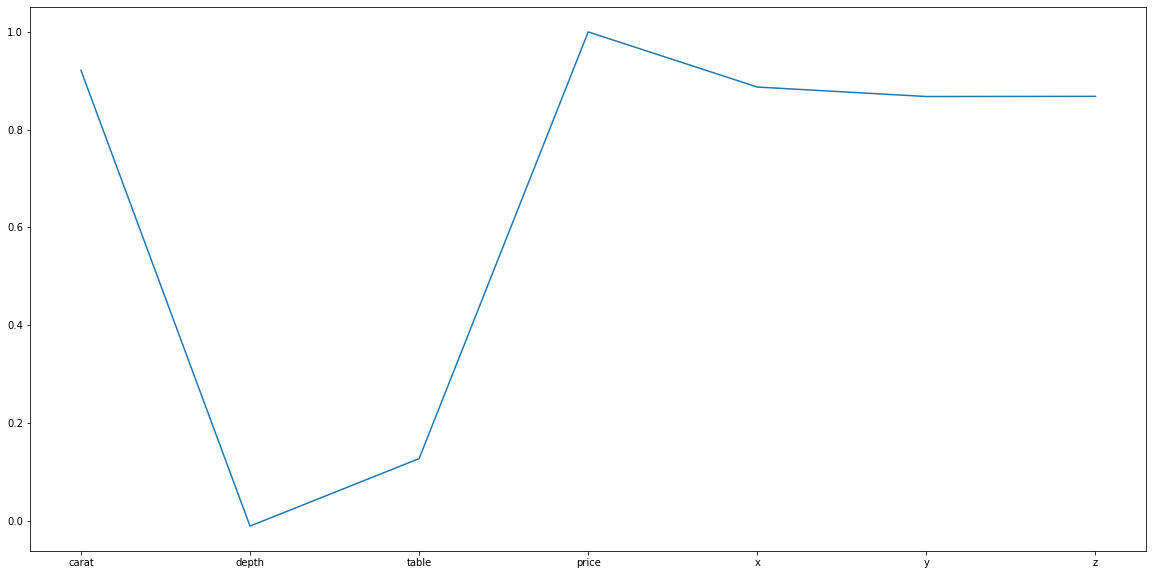

In [24]:
# Correlation with Target Variable

df.corr()['price'].plot()
#autinsurance.corr().plot()

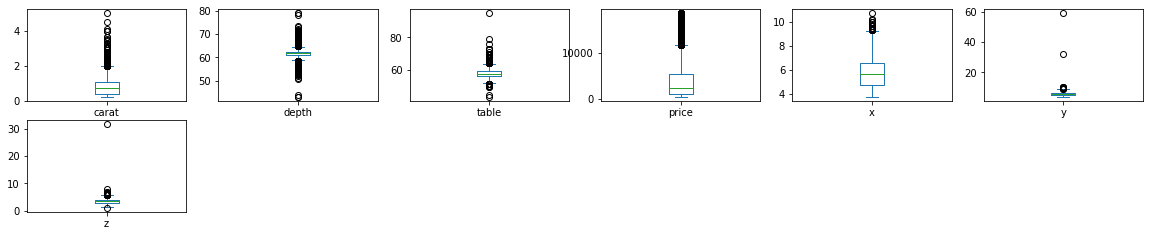

In [25]:
# Box and Whisker Plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,20  # control plot size
df.plot(kind='box', subplots=True, layout=(10,6), sharex=False, sharey=False)
plt.show()


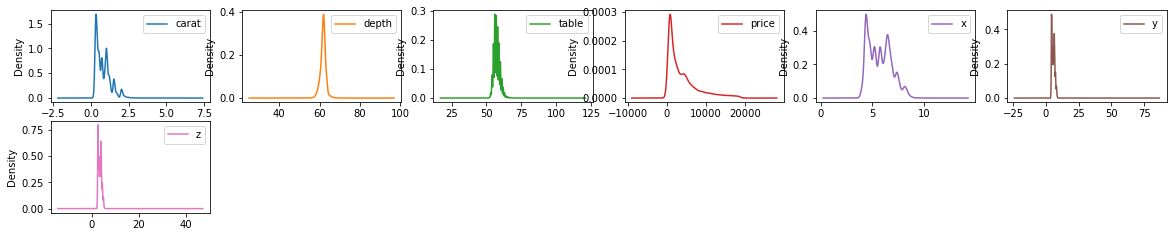

In [26]:
# Univariate Density Plots
plt.rcParams['figure.figsize'] = 20,20  # control plot size

df.plot(kind='density', subplots=True, layout=(10,6), sharex=False)
plt.show()


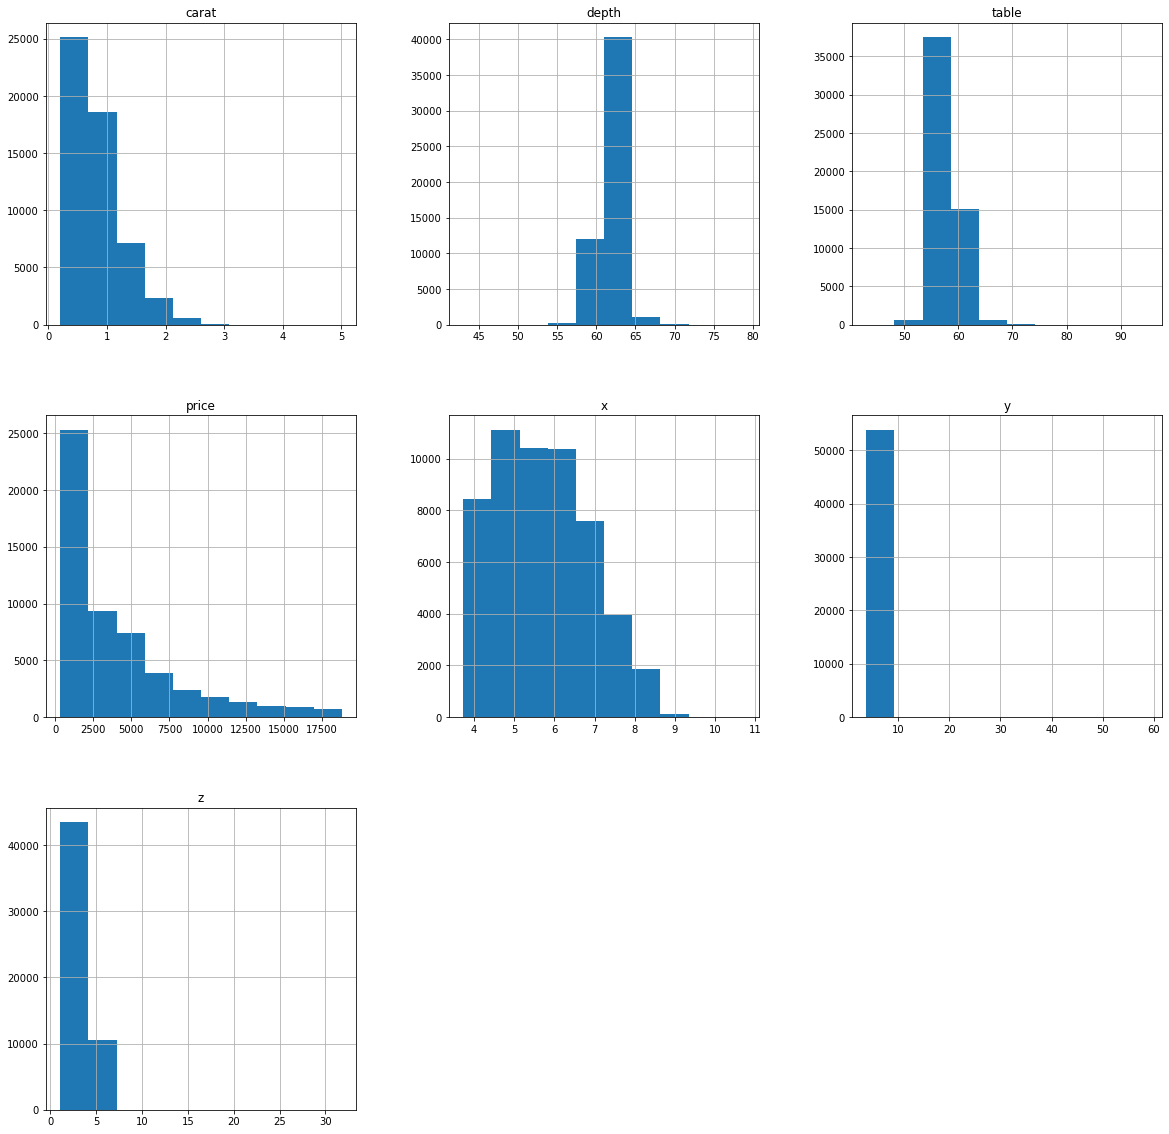

In [27]:
# Univariate Histograms
plt.rcParams['figure.figsize'] = 20,20  # control plot size

df.hist()
plt.show()


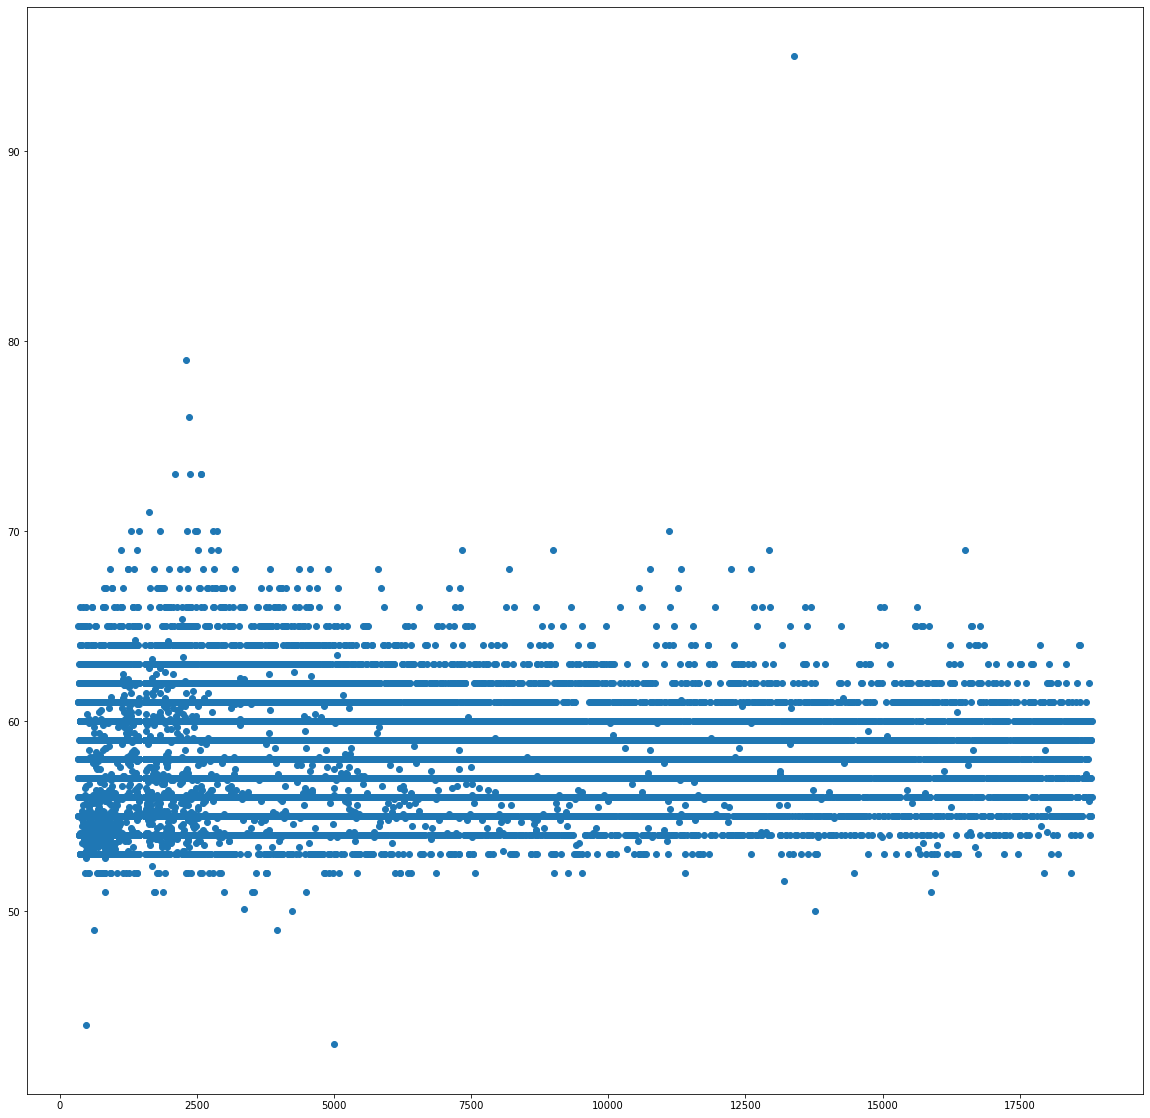

In [34]:
plt.scatter(df['price'], df['table']);

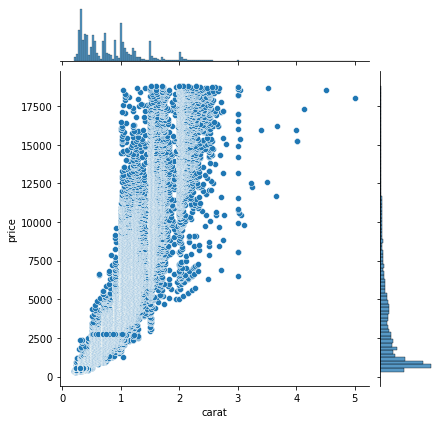

In [30]:
sns.jointplot(x='carat', y='price', 
              data=df, kind='scatter');

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


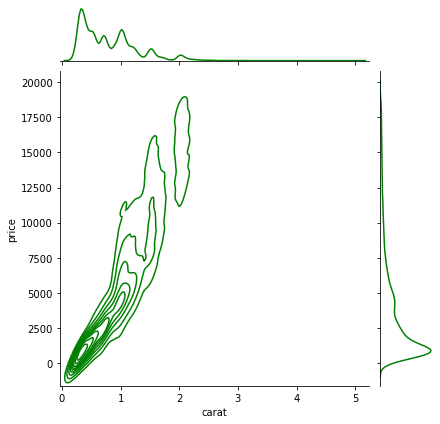

In [31]:
sns.jointplot('carat', 'price', data=df,
              kind="kde", color="g");

In [32]:
corr = df.corr()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.50)]
to_drop

/tmp/ipykernel_421/1200380641.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


['price', 'x', 'y', 'z']

In [33]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


In [36]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

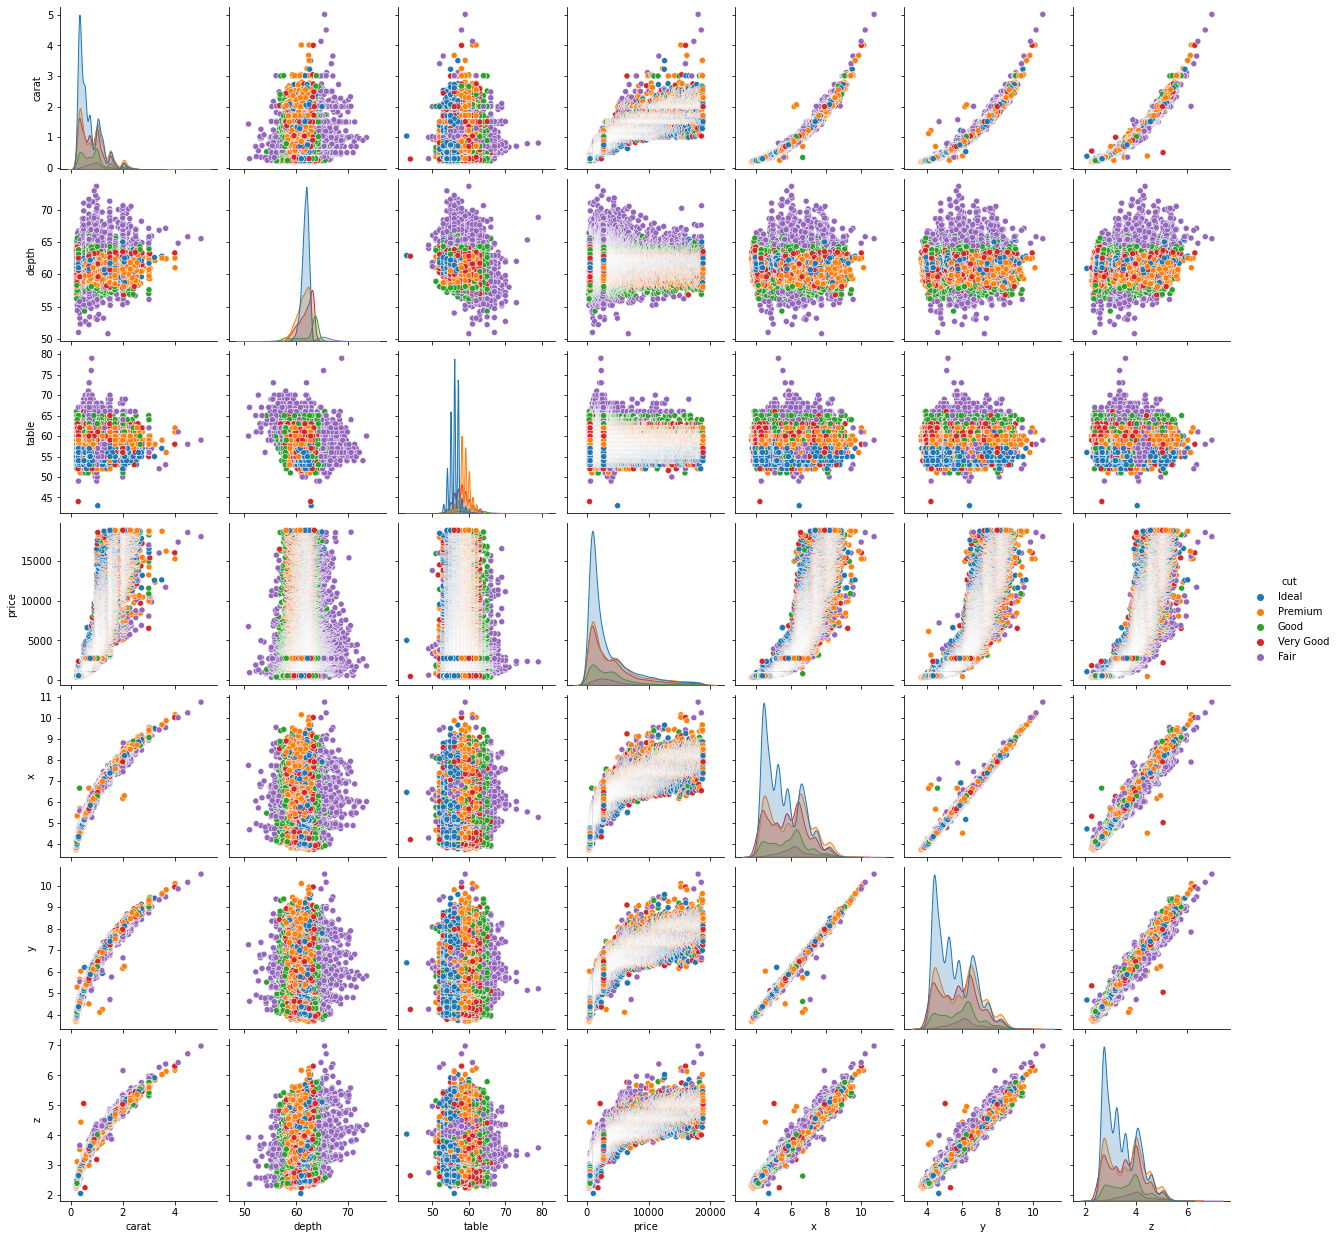

In [38]:
ax=sns.pairplot(df, hue= "cut")

In [39]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [118]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [111]:
import pandas as pd
data_cut={'cut':['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']}
df_cut=pd.DataFrame(data_cut)
df_cut
cut_rating_dict={'Ideal':5, 'Premium':4, 'Good':3, 'Very Good':2, 'Fair':1}
label_data['cut_o']=df.cut.map(cut_rating_dict)

In [126]:
data_color={'color':['E', 'I', 'J', 'H', 'F', 'G', 'D']}
df_color=pd.DataFrame(data_color)
df_color
color_rating_dict={'D':7, 'E':6, 'F':5, 'G':4, 'H':3,'I':2,'J':1}
label_data['color_o']=df.color.map(color_rating_dict)

In [127]:
label_data.color_o.unique()

array([6, 2, 1, 3, 5, 4, 7])

In [125]:
df_color

,color
0,E
1,I
2,J
3,H
4,F
5,G
6,D


In [128]:
data_clarity={'clarity':['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']}
df_clarity=pd.DataFrame(data_color)
df_clarity
clarity_rating_dict={'SI2':2, 'SI1':3, 'VS1':5, 'VS2':4, 'VVS2':6, 'VVS1':7, 'I1':1, 'IF':8}
label_data['clarity_o']=df.clarity.map(clarity_rating_dict)

<AxesSubplot:xlabel='cut', ylabel='price'>

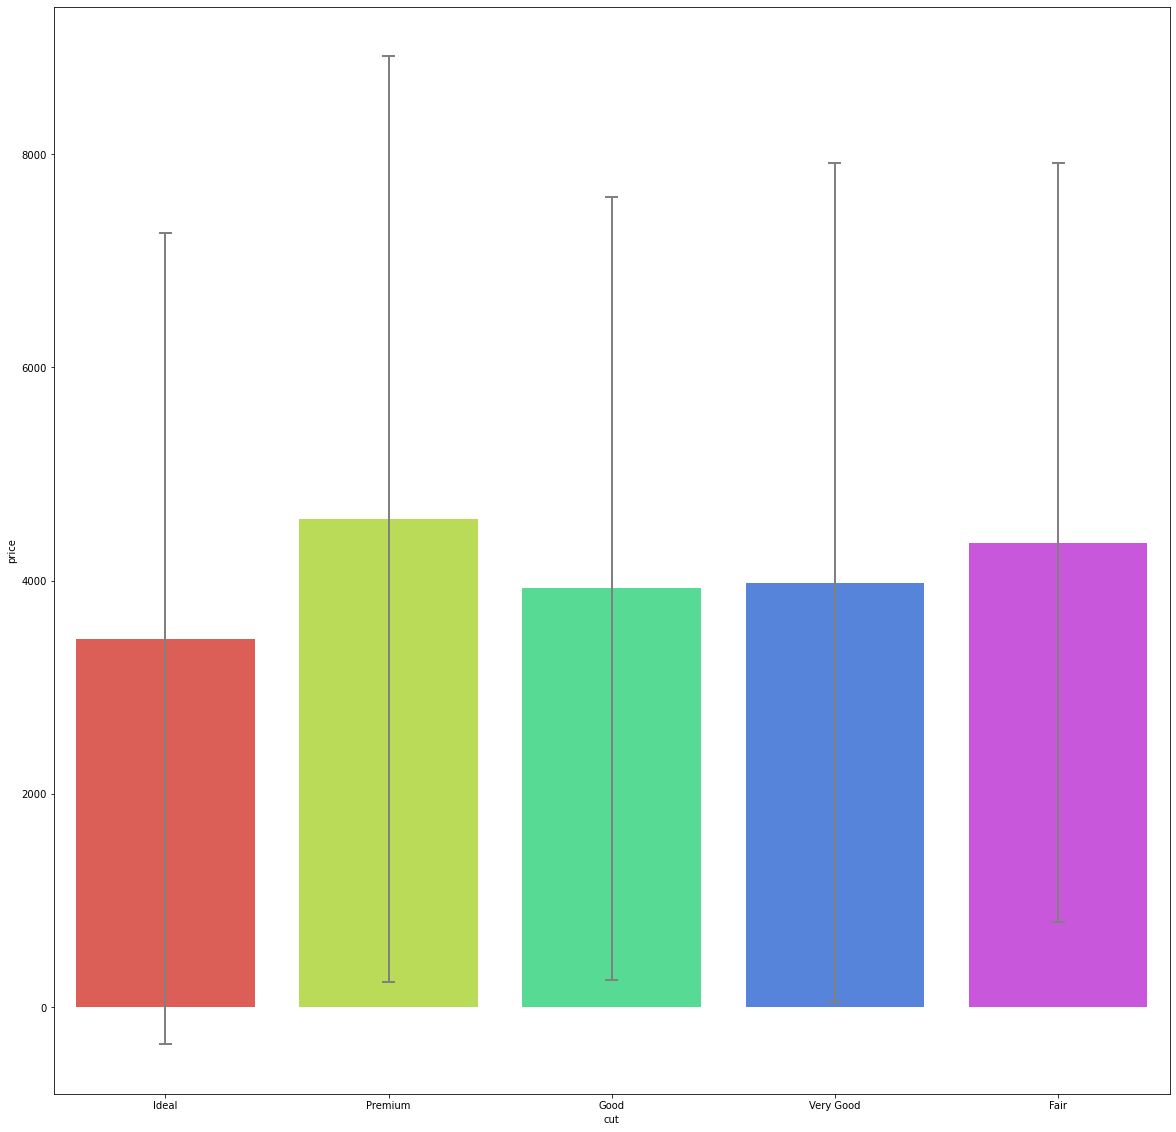

In [113]:
# create plot
sns.barplot(x = 'cut', y = 'price', #hue = 'color',
            data = df,
            palette = 'hls',
            order = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

<AxesSubplot:xlabel='cut_o', ylabel='price'>

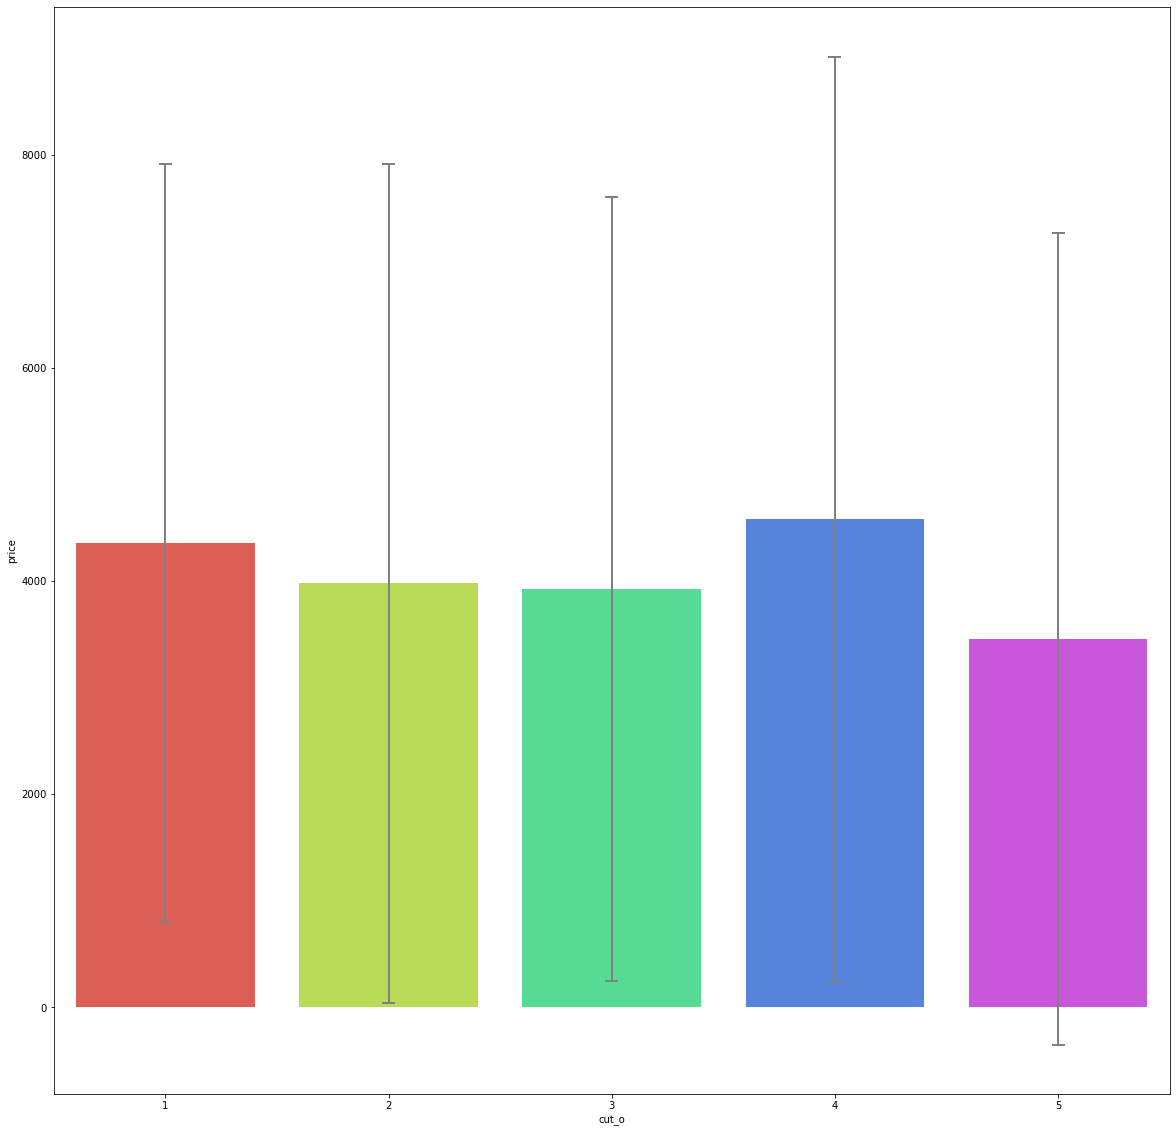

In [115]:
# create plot
sns.barplot(x = 'cut_o', y = 'price', #hue = 'color',
            data = label_data,
            palette = 'hls',
           # order = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [59]:
label_data.cut.unique()

array([2, 3, 1, 4, 0])

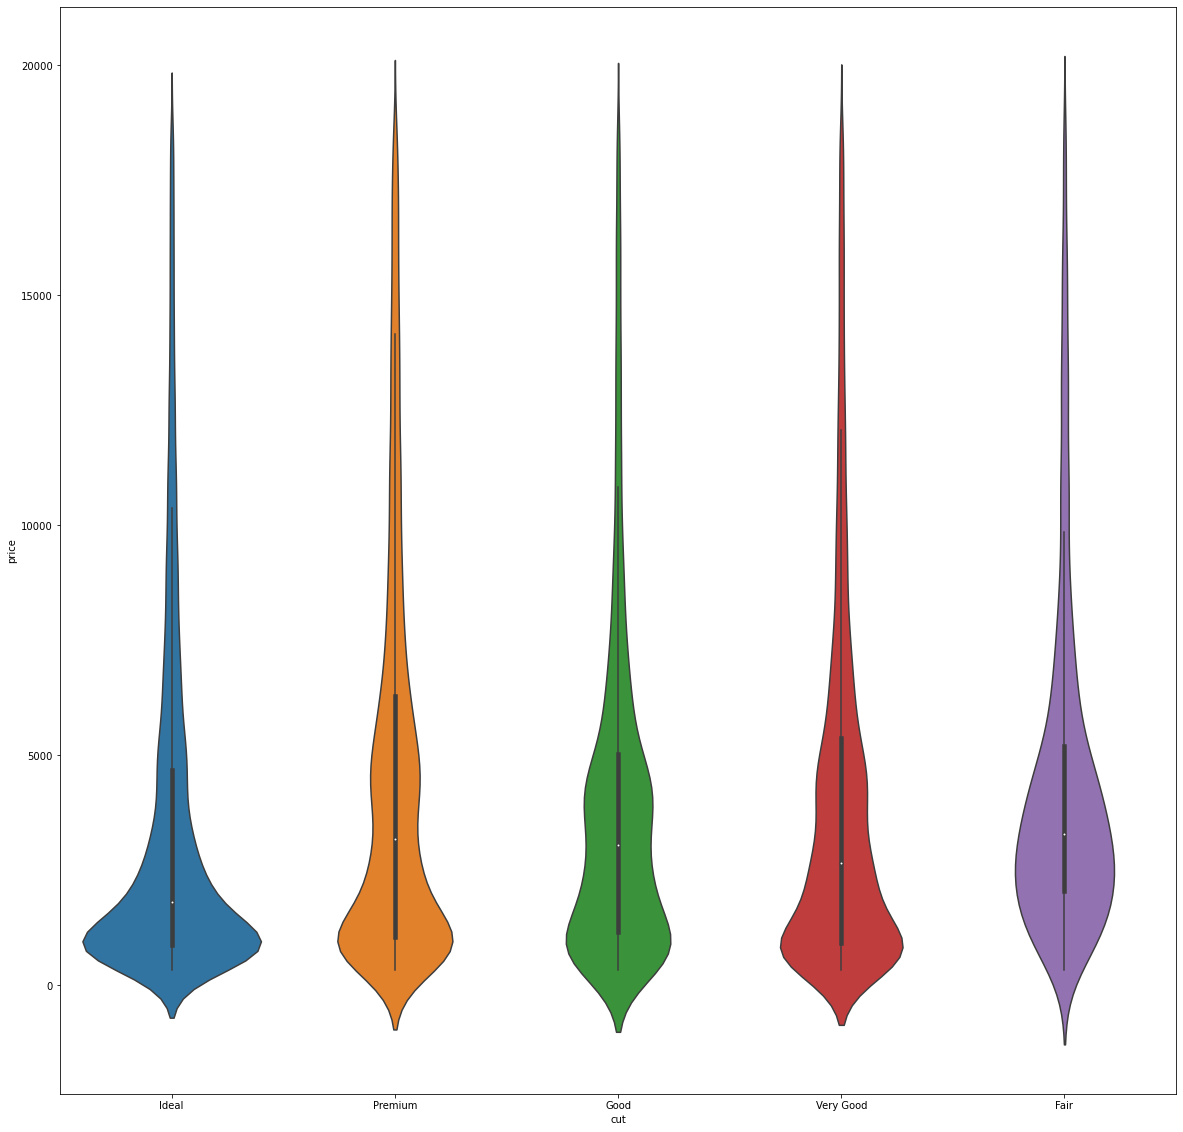

In [41]:
ax = sns.violinplot(x="cut", y="price", data=df)

In [44]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [122]:
label_data.drop("clarity", axis=1, inplace=True)

<AxesSubplot:>

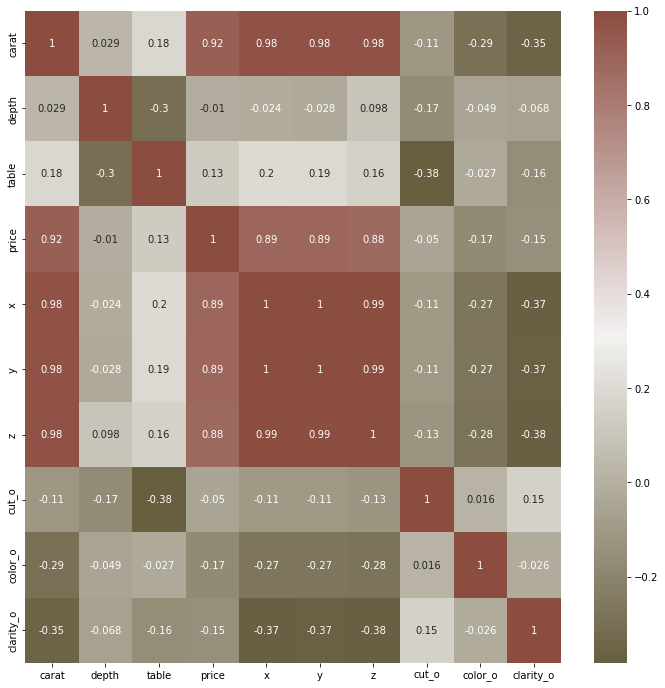

In [130]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [46]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53907.0,0.797628,0.473765,0.20,0.40,0.70,1.04,5.01
depth,53907.0,61.749741,1.420119,50.80,61.00,61.80,62.50,73.60
table,53907.0,57.455948,2.226153,43.00,56.00,57.00,59.00,79.00
price,53907.0,3930.584470,3987.202815,326.00,949.00,2401.00,5322.00,18823.00
x,53907.0,5.731463,1.119384,3.73,4.71,5.70,6.54,10.74
y,53907.0,5.733292,1.111252,3.68,4.72,5.71,6.54,10.54
z,53907.0,3.539441,0.691434,2.06,2.91,3.53,4.04,6.98


In [129]:
label_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53907.0,0.797628,0.473765,0.20,0.40,0.70,1.04,5.01
depth,53907.0,61.749741,1.420119,50.80,61.00,61.80,62.50,73.60
table,53907.0,57.455948,2.226153,43.00,56.00,57.00,59.00,79.00
price,53907.0,3930.584470,3987.202815,326.00,949.00,2401.00,5322.00,18823.00
x,53907.0,5.731463,1.119384,3.73,4.71,5.70,6.54,10.74
y,53907.0,5.733292,1.111252,3.68,4.72,5.71,6.54,10.54
z,53907.0,3.539441,0.691434,2.06,2.91,3.53,4.04,6.98
cut_o,53907.0,3.771310,1.265813,1.00,2.00,4.00,5.00,5.00
color_o,53907.0,4.405977,1.701286,1.00,3.00,4.00,6.00,7.00
clarity_o,53907.0,4.051626,1.647087,1.00,3.00,4.00,5.00,8.00


In [50]:
# confirm no missing data
label_data[['carat','cut','color','clarity','depth','table','price','x','y','z']].isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
dtype: int64

In [51]:
# confirm all numerical
label_data[['carat','cut','color','clarity','depth','table','price','x','y','z']].dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Model Building

In [131]:
# declare features and target
features = ['carat','cut_o','color_o','clarity_o','depth','table','x','y','z']
y = label_data['price']
X = label_data[features]
print(y.shape, X.shape)

(53907,) (53907, 9)


In [132]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [238]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [240]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([10923.64837402,    88.89633052,   324.10361701,   499.6267493 ,
         248.02276742,   -29.88355139,  -717.0751204 ,  3311.53248179,
       -5703.46619611])

In [135]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} '
print("Regression Equation: ", equation)  

Regression Equation:  y = -16859.9616 + 10923.6484*carat + 88.8963*cut_o + 324.1036*color_o + 499.6267*clarity_o+ 248.0228*depth+ -29.8836*table 


In [136]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[3167, 666, 9482, 891, 738]
[3281, -461, 12699, 1854, 1292]


## Model Evaluation

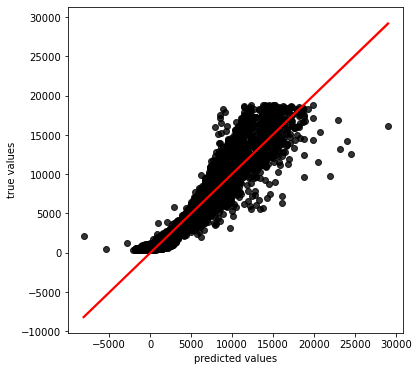

In [139]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [140]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.91

In [141]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

1174.693296514903

In [142]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

4000.04
1174.69
improvement: -2825.35


In [144]:
print(label_data.columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_o', 'color_o', 'clarity_o'], dtype='object')


In [145]:
 X = label_data.drop('price', axis = 1)
 y = label_data.price

In [146]:
X.shape

(53907, 9)

In [152]:
y.shape

(53907,)

In [154]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
label_data
training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

In [155]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel = DecisionTreeRegressor(random_state = 0)
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables
DecisionTreePred = DecisionTreeModel.predict(test_features) # I already Know y_test

In [156]:
DecisionTreeModel.fit(training_features, training_target)
### Verification:
results = pd.DataFrame(index= training_features.columns, data={'importance':DecisionTreeModel.feature_importances_})
print('Feature importances:\n{}'.format(results))

Feature importances:
           importance
carat        0.626508
depth        0.003190
table        0.002395
x            0.003784
y            0.263650
z            0.004980
cut_o        0.001600
color_o      0.030650
clarity_o    0.063242


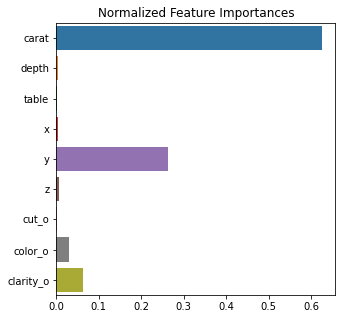

In [197]:
# Plot feature importances
plt.rcParams['figure.figsize'] = 5,5
plt.title('Normalized Feature Importances')
sns.barplot(y =training_features.columns, x = DecisionTreeModel.feature_importances_)
plt.show()

In [159]:
feature_importances = pd.DataFrame({'Importance Coef' :DecisionTreeModel.feature_importances_ , 'Features' : training_features.columns})
feature_importances.nlargest(60, 'Importance Coef')

,Importance Coef,Features
0,0.626508,carat
4,0.263650,y
8,0.063242,clarity_o
7,0.030650,color_o
5,0.004980,z
3,0.003784,x
1,0.003190,depth
2,0.002395,table
6,0.001600,cut_o


In [254]:
label_data_feature = label_data[[
'carat'
,'y'
,'clarity_o'
,'color_o'
,'cut_o'
,'price']]

In [189]:
X_1.columns 
#-16903.170131143663
[11012.51276826   251.25132341   -30.05485823  -675.64468747
  3286.57203972 -5788.10326035    86.88201502   324.45846532
   498.25071569]


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_o', 'color_o', 'clarity_o'], dtype='object')

In [255]:
 X_1 = label_data_feature.drop('price', axis = 1)
 y_1 = label_data_feature.price

In [256]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
label_data_feature
training_features, test_features, \
training_target, test_target, = train_test_split(X_1,
                                               y_1,
                                               test_size = .2,
                                               random_state=12)

In [257]:
training_features.columns

Index(['carat', 'y', 'clarity_o', 'color_o', 'cut_o'], dtype='object')

In [258]:
from sklearn.linear_model import LinearRegression # Class
LRegressor = LinearRegression(fit_intercept=True)
LRegressor.fit(training_features, training_target)

LinearRegression()

In [259]:
 X_1.columns

Index(['carat', 'y', 'clarity_o', 'color_o', 'cut_o'], dtype='object')

In [260]:
print(LRegressor.intercept_)
print(LRegressor.coef_)

-4472.179472605569
[10253.30806001  -652.37908973   519.76911374   325.82712402
   111.71974812]


In [261]:
y_train_pred = LRegressor.predict(training_features)
y_train_pred

array([ 204.30369109,   -9.84620413, 1446.55941535, ..., 9061.08737164,
        484.37434863, 5746.69233862])

In [262]:
y_test_pred = LRegressor.predict(test_features)
y_test_pred.flatten()

array([ 3254.80550065,  -485.24975274, 12788.24593615, ...,
        3294.0240826 ,   134.56833504, 12070.32450086])

In [263]:
df_compare = pd.DataFrame({'Actual': test_target, 'Predicted': y_test_pred.flatten()})
df_compare.head()

,Actual,Predicted
2316,3167,3254.805501
28178,666,-485.249753
21338,9482,12788.245936
35187,891,1842.890596
30721,738,1203.134393


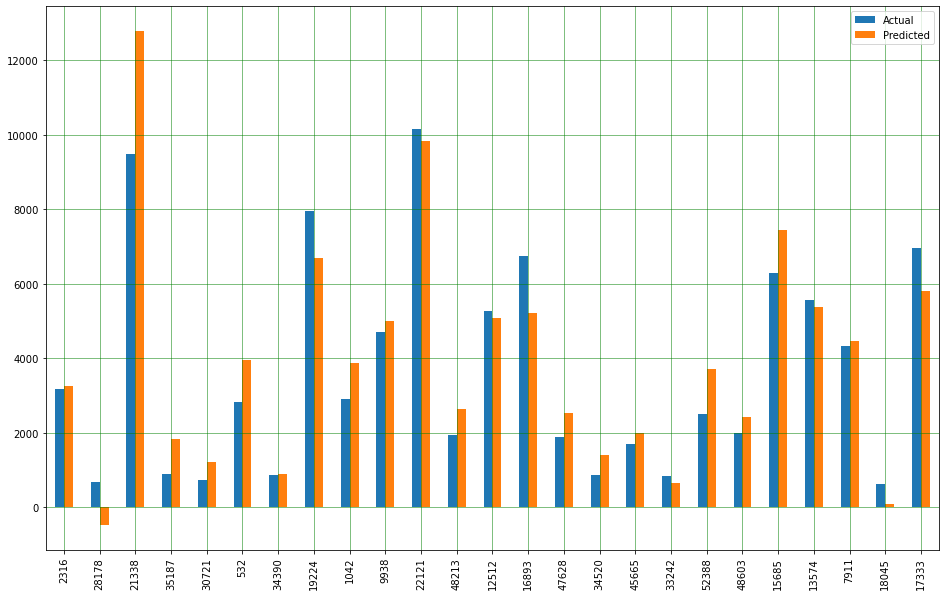

In [264]:
df_compare = df_compare.head(25)
df_compare.plot(kind='bar',figsize=(16,10))
plt.rcParams['figure.figsize'] = 5,5
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

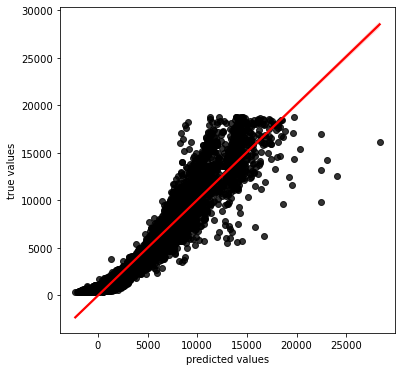

In [265]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_test_pred, 
                 y = test_target, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [266]:
# Predicting the Test set results

y_pred = LRegressor.predict(test_features)

print(LRegressor.intercept_)
print(LRegressor.coef_)

-4472.179472605569
[10253.30806001  -652.37908973   519.76911374   325.82712402
   111.71974812]


In [267]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_target, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_target, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_target, y_test_pred)))

Mean Absolute Error: 816.324975736128
Mean Squared Error: 1462062.252564345
Root Mean Squared Error: 1209.1576624098054


In [268]:
from sklearn.metrics import r2_score
r2_score(training_target, y_train_pred)

0.9040939019661693

## Make new predictions

In [147]:
y.shape

(53907,)

In [143]:
# remember the linear regression equation?
print(equation)

y = -16859.9616 + 10923.6484*carat + 88.8963*cut_o + 324.1036*color_o + 499.6267*clarity_o+ 248.0228*depth+ -29.8836*table 


In [208]:
# make some fake data
fake1= [[0.5, 2, 4,4, 55, 55,5,30,20]] # modest SF home
fake2= [[0.3, 3, 5,5, 55, 65,4,40,25]] # large SF home in big neighborhood
fake3= [[0.4, 4, 6,6, 55, 48,3,50,30]] # small home, not SF, outside big neighborhood

In [209]:
# make predictions just using our equation:
for data in [fake1, fake2, fake3]:
    YearBuilt=data[0][0]
    Bathrooms=data[0][1]
    BedroomAbvGr=data[0][2]
    TotalSF=data[0][3]
    SingleFam=data[0][4]
    LargeNeighborhood=data[0][5]
    y = -1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood 
    print('$',int(y))

$ -340140
$ -401648
$ -283739


In [269]:
# pickle your model
import pickle
filename = open('diamond_price_predict.pkl', 'wb')
pickle.dump(LRegressor, filename)
filename.close()

In [270]:
## read in our pickle file
filename = open('diamond_price_predict.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [273]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

$ 3031
$ 54
$ 18196


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Turn that into a function

In [36]:
def ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood):
    checksum=0
    for var in [YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]:
        if isinstance(var,int)==False:
            checksum+=1
    if (YearBuilt<1900)|(YearBuilt>2020):
        checksum+=1
    if (Bathrooms<1) | (Bathrooms>5):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (LargeNeighborhood!=0) & (LargeNeighborhood!=1):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [37]:
# test the function
YearBuilt=2015
Bathrooms=3
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
LargeNeighborhood=1
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood)

'$166,799.10'

In [213]:
def diamond_price(clicks, carat,cut,color,clarity,table,depth,x,y,z):
    if clicks==0:
        return "waiting for inputs"
    else:
        y = [-16903.17 + 11012.51*carat + 251.25*cut + -30.05*color + -675.64*clarity+ 3286.57*table+ -5788.10*depth+ 86.88*x+ 324.46*y+ 498.25*z]
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y

In [ ]:
# make some fake data
fake1= [[0.5, 2, 4,4, 55, 55,5,30,20]] # modest SF home
fake2= [[0.3, 3, 5,5, 55, 65,4,40,25]] # large SF home in big neighborhood
fake3= [[0.4, 4, 6,6, 55, 48,3,50,30]] # small home, not SF, outside big neighborhood

In [248]:
test_features.head()

,carat,y,clarity_o,color_o
2316,0.72,5.81,5,3
28178,0.41,4.78,2,4
21338,2.04,8.04,2,1
35187,0.31,4.42,8,4
30721,0.41,4.77,4,7


In [280]:
test_features.y.unique()

array([5.81, 4.78, 8.04, 4.42, 4.77, 5.74, 6.42, 5.43, 6.18, 7.32, 5.39,
       6.26, 6.39, 5.1 , 4.43, 5.12, 4.84, 5.36, 5.49, 7.02, 6.49, 4.25,
       6.62, 4.57, 7.72, 5.78, 4.31, 4.53, 5.04, 7.99, 6.13, 5.57, 6.59,
       4.39, 5.77, 5.72, 5.6 , 6.4 , 4.82, 6.73, 5.37, 6.14, 6.33, 6.57,
       7.92, 5.48, 4.8 , 7.98, 5.71, 5.33, 5.02, 6.09, 6.08, 6.38, 6.12,
       4.33, 5.75, 4.94, 6.51, 6.21, 5.86, 4.41, 5.79, 6.56, 4.34, 4.32,
       4.83, 4.69, 3.96, 4.29, 4.49, 5.85, 7.73, 4.46, 5.83, 4.71, 8.18,
       7.47, 5.97, 7.3 , 4.26, 4.81, 5.68, 5.88, 5.29, 5.35, 4.5 , 4.35,
       6.72, 4.63, 4.87, 6.76, 5.45, 6.35, 6.28, 6.17, 7.34, 6.74, 6.5 ,
       8.56, 5.84, 6.44, 4.51, 7.2 , 4.47, 5.96, 6.34, 4.44, 5.24, 4.24,
       7.93, 8.21, 6.2 , 7.51, 4.01, 6.24, 4.37, 6.6 , 4.55, 7.38, 6.53,
       4.79, 6.52, 6.84, 5.11, 4.22, 4.54, 6.04, 6.68, 4.7 , 4.52, 6.45,
       4.65, 5.9 , 6.36, 8.25, 4.36, 6.46, 5.8 , 5.13, 4.59, 6.31, 8.06,
       7.42, 7.9 , 6.63, 5.69, 7.58, 5.63, 4.2 , 5.

In [283]:
# make some fake data
fake1= [[0.72, 5.81, 5,3,3]] # modest SF home
fake2= [[5.51, 8.78, 2,6,4]] # large SF home in big neighborhood
fake3= [[2.04, 10.04, 8,7,5]] # small home, not SF, outside big neighborhood

In [284]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

$ 3031
$ 49737
$ 16892


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [272]:
diamond_price(1, 0.5,2,4,4,55,55,5,30,20)

'$-131,168.12'

In [ ]:
Index(['carat', 'y', 'clarity_o', 'color_o']